<a href="https://colab.research.google.com/github/anbr1x/Portafolio/blob/main/An%C3%A1lisis%20Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
 
import pandas_datareader.data as web

import pandas as pd

import datetime as dt
 
 

In [ ]:
import pandas

df = pandas.read_csv('/content/drive/MyDrive/Sample data/datos100reales.csv')
df = df.rename(columns={'giroscopio': 'Potenciometro'})
df1 = df.iloc[142:840] #se limpia los extremos 
df

,tiempo,camara,Potenciometro
0,0.000,170.84,171.50
1,0.068,173.02,171.60
2,0.127,174.01,173.22
3,0.182,175.73,173.22
4,0.245,176.86,175.14
...,...,...,...
892,43.589,178.57,161.10
893,43.646,179.80,165.60
894,43.696,179.96,170.34
895,43.739,172.73,172.26


In [ ]:
angulomin = df["camara"].min()
angulomax = df["camara"].max()
print(angulomin)
print(angulomax)

40.51
180.0


In [ ]:
angulomin1 = df["Potenciometro"].min()
angulomax1 = df["Potenciometro"].max()
print(angulomin1)
print(angulomax1)

60.0
183.72


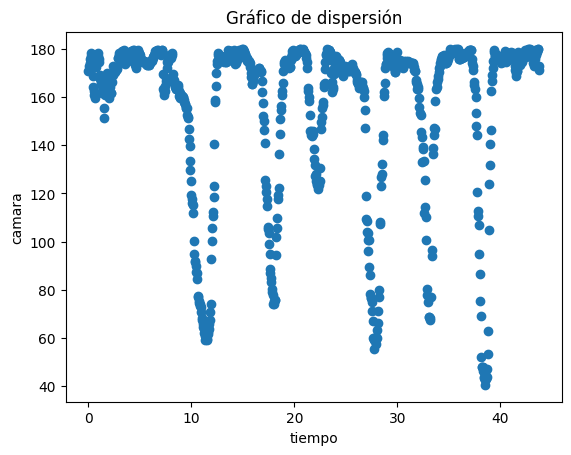

In [ ]:
import matplotlib.pyplot as plt
# Crear un gráfico de dispersión de 'precio' vs 'cantidad'
plt.scatter(df['tiempo'], df['camara'])

# Establecer el título y las etiquetas de los ejes
plt.title('Gráfico de dispersión')
plt.xlabel('tiempo')
plt.ylabel('camara')

# Mostrar el gráfico
plt.show()

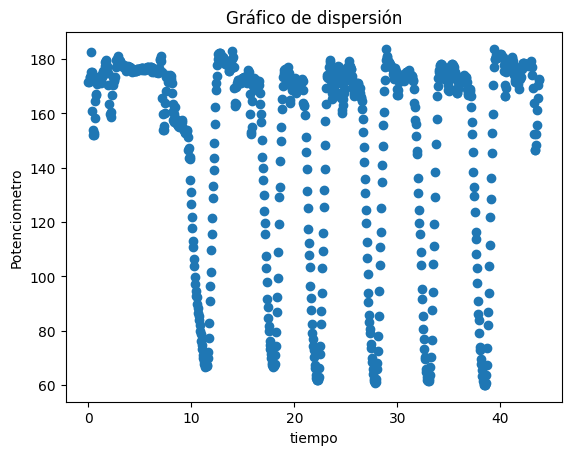

In [ ]:
import matplotlib.pyplot as plt
# Crear un gráfico de dispersión de 'precio' vs 'cantidad'
plt.scatter(df['tiempo'], df['Potenciometro'])

# Establecer el título y las etiquetas de los ejes
plt.title('Gráfico de dispersión')
plt.xlabel('tiempo')
plt.ylabel('Potenciometro')

# Mostrar el gráfico
plt.show()

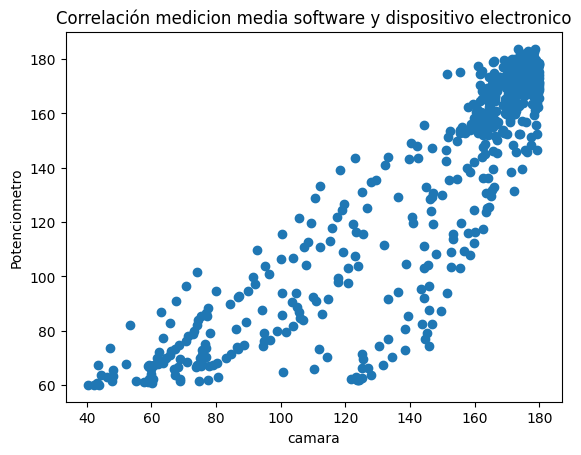

In [ ]:
# Crear un scatter plot de columna1 y columna2
plt.scatter(df['camara'], df['Potenciometro'])
plt.xlabel('camara')
plt.ylabel('Potenciometro')
plt.title('Correlación medicion media software y dispositivo electronico')
plt.show()


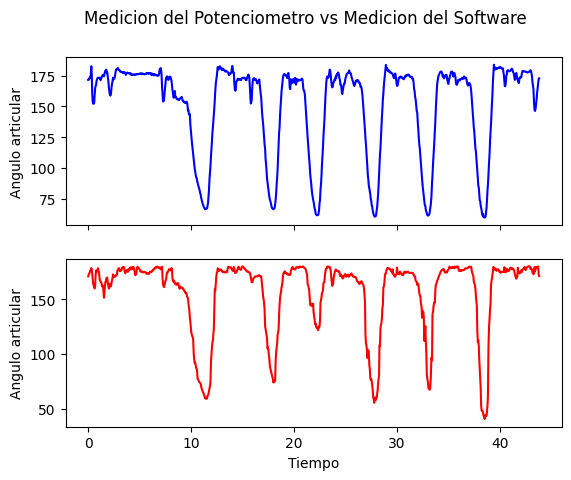

<Figure size 800x600 with 0 Axes>

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.suptitle('Medicion del Potenciometro vs Medicion del Software')
# Configurar el primer subgráfico para trazar columna1

ax1.plot(df['tiempo'], df['Potenciometro'], color='blue')
ax1.set_ylabel('Angulo articular')
ax2.set_xlabel('Tiempo')

# Configurar el segundo subgráfico para trazar columna2
ax2.plot(df['tiempo'], df['camara'], color='red')
ax2.set_ylabel('Angulo articular')
ax2.set_xlabel('Tiempo')
plt.figure(figsize=(8, 6))
# Mostrar el gráfico completo
plt.show()

# Segmentar las repes por angulo de la camara

In [ ]:
parte1 = df.iloc[142: 330]

parte2 = df.iloc[330: 416]
parte3 = df.iloc[416:519]

parte4 = df.iloc[519:647]

parte5 = df.iloc[647:745]

parte6 = df.iloc[745:]


# Prestest para pruebas estadisticas

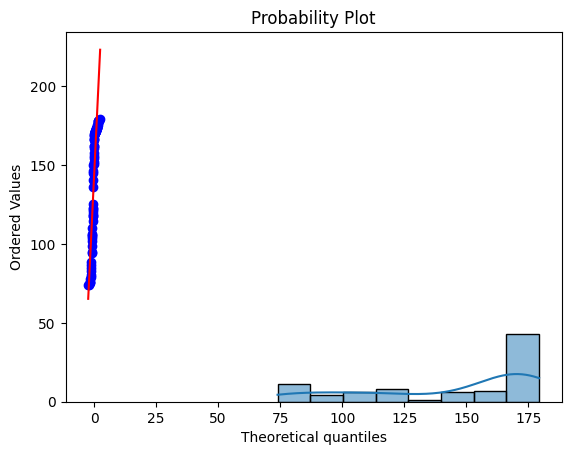

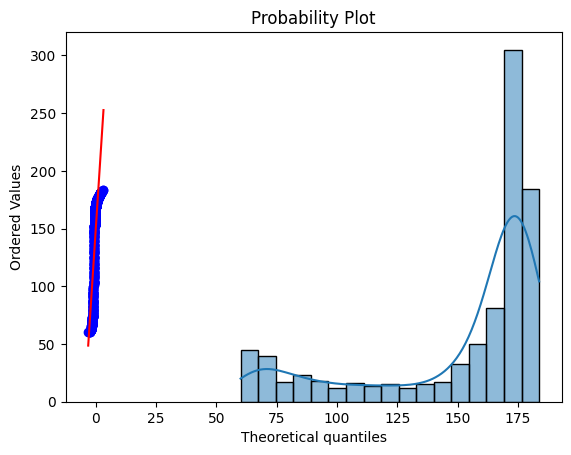

In [ ]:
import seaborn as sns
import scipy.stats as stats
# Visualización de histograma y gráfico de probabilidad normal
sns.histplot(parte2['camara'], kde=True)
stats.probplot(parte2['camara'], plot=sns.mpl.pyplot)
sns.mpl.pyplot.show()

# Visualización de histograma y gráfico de probabilidad normal
sns.histplot(df['Potenciometro'], kde=True)
stats.probplot(df['Potenciometro'], plot=sns.mpl.pyplot)
sns.mpl.pyplot.show()

In [ ]:
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
stat, p = shapiro(df['camara'])
print('Estadística de prueba:', stat)
print('Valor p:', p)

# Interpretación del resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (los datos están distribuidos normalmente)')
else:
    print('Se rechaza la hipótesis nula (los datos no están distribuidos normalmente)')


Estadística de prueba: 0.6728596091270447
Valor p: 2.3990151236526866e-38
Se rechaza la hipótesis nula (los datos no están distribuidos normalmente)


In [ ]:
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
stat, p = shapiro(df['Potenciometro'])
print('Estadística de prueba:', stat)
print('Valor p:', p)

# Interpretación del resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (los datos están distribuidos normalmente)')
else:
    print('Se rechaza la hipótesis nula (los datos no están distribuidos normalmente)')


Estadística de prueba: 0.727497935295105
Valor p: 7.486690803991643e-36
Se rechaza la hipótesis nula (los datos no están distribuidos normalmente)


In [ ]:
from scipy.stats import levene

# Prueba de Levene
stat, p = levene(df['camara'], df['Potenciometro'])
print('Estadística de prueba:', stat)
print('Valor p:', p)

# Interpretación del resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (las varianzas son iguales)')
else:
    print('Se rechaza la hipótesis nula (las varianzas no son iguales)')


Estadística de prueba: 7.37682650922867
Valor p: 0.00667044601996822
Se rechaza la hipótesis nula (las varianzas no son iguales)


In [ ]:
parte4

,tiempo,camara,Potenciometro
519,25.007,171.20,173.52
520,25.053,170.68,175.14
521,25.100,170.68,176.10
522,25.142,171.80,176.52
523,25.192,172.36,177.00
...,...,...,...
642,30.789,174.08,174.48
643,30.831,174.08,174.18
644,30.876,175.12,175.32
645,30.927,174.53,175.32


## Se verifico que no hay homogeneidad de varianza ni normalidad 
### por tanto se usa la prueba La prueba de Wilcoxon para muestras pareadas


# Orden de toma de datos



1.   perpendicular con la camara , 7s
2.   rotacion de 45° antihorario (diagonal del perfil izquierdo), 16s
3.   90° antihorario (mirando ala camara), 20s
4.   180° antihorario(perfil contrario al del sensor) 25s
5.   225° antihorario (diagonal del perfil derecho)31s
6.   270° antihorario (de espaldas ala camara)36s









In [ ]:
import pandas as pd
from scipy.stats import wilcoxon

# Cargar los datos en un dataframe de pandas

# Aplicar la prueba de Wilcoxon para muestras pareadas
w_statistic, p_value = wilcoxon(parte2["camara"], parte2["Potenciometro"])

# Imprimir los resultados
print("w-statistic:", w_statistic)
print("p-value:", p_value)

# Conclusión
if p_value < 0.05:
    print("Se rechaza la hipótesis nula y se concluye que hay una diferencia significativa entre las dos muestras.")
else:
    print("No se puede rechazar la hipótesis nula y no se concluye que haya una diferencia significativa entre las dos muestras.")


w-statistic: 440.0
p-value: 7.286970649137622e-10
Se rechaza la hipótesis nula y se concluye que hay una diferencia significativa entre las dos muestras.


# Calculo de diferencia significativa para cada una de las repes

0.9126006156093239
7.286970649137622e-10
5.468982989076735e-17
0.003514869584675255
9.678472292246787e-13
0.000627261360987401


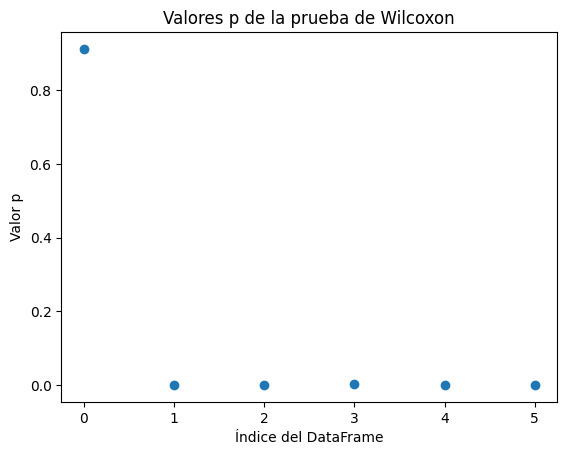

<Figure size 800x600 with 0 Axes>

In [ ]:
# lista de nombres de los dataframes
lista_dataframes = [parte1, parte2, parte3, parte4, parte5, parte6]

import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

# Crear una lista de los nombres de las columnas que deseas comparar
columnas = ['camara', 'Potenciometro']

# Crear una lista vacía para almacenar los valores p de cada DataFrame
p_values = []

# Iterar sobre cada DataFrame
for datf in lista_dataframes:
    # Seleccionar las columnas a comparar
    columnas = datf.columns[:2]
    # Realizar la prueba de Wilcoxon en las dos columnas
    _, p = wilcoxon(datf.iloc[:,1], datf.iloc[:,2])
    print(p)
    # Agregar el valor p a la lista
    p_values.append(p)

# Crear un gráfico de barras para mostrar los valores p
import matplotlib.pyplot as plt

plt.scatter(np.arange(len(p_values)), p_values)
plt.title('Valores p de la prueba de Wilcoxon')
plt.xlabel('Índice del DataFrame')
plt.ylabel('Valor p')
plt.figure(figsize=(8, 6))
plt.show()



# convertidor a spss

# Pruebas estadisticas de correlacion


In [ ]:
df

,tiempo,camara,Potenciometro
0,0.000,170.84,171.50
1,0.068,173.02,171.60
2,0.127,174.01,173.22
3,0.182,175.73,173.22
4,0.245,176.86,175.14
...,...,...,...
892,43.589,178.57,161.10
893,43.646,179.80,165.60
894,43.696,179.96,170.34
895,43.739,172.73,172.26


In [ ]:
# Calcular la correlación de Pearson
correlacion = df['camara'].corr(df['Potenciometro'])

print('La correlación de Pearson entre camara y giroscopio es:', correlacion)


La correlación de Pearson entre camara y giroscopio es: 0.9174586998382879


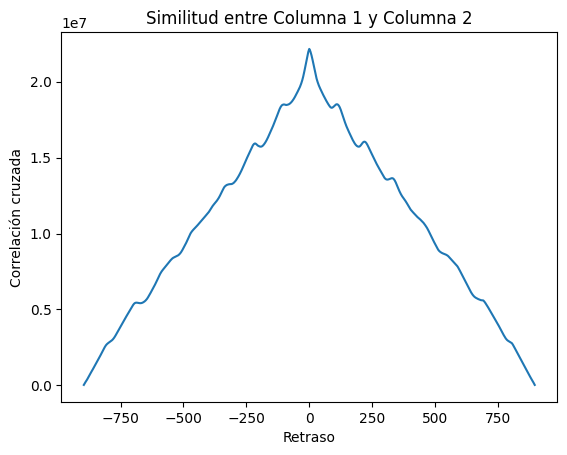

In [ ]:
import numpy as np
# Calcular la correlación cruzada
xcorr = np.correlate(df['camara'], df['Potenciometro'], mode='full')

# Calcular el tiempo de retraso correspondiente a cada valor de correlación
lags = np.arange(-len(df)+1, len(df))

# Graficar la correlación cruzada
plt.plot(lags, xcorr)
plt.xlabel('Retraso')
plt.ylabel('Correlación cruzada')
plt.title('Similitud entre Columna 1 y Columna 2')
plt.show()


# Error entre camara y potenciometro

In [ ]:
import pandas as pd

# Crear un dataframe de ejemplo

# Calcular el porcentaje de error para cada fila
df['porcentaje_error'] = abs(df['Potenciometro'] - df['camara']) / abs(df['Potenciometro']) * 100

# Calcular el promedio de los porcentajes de error
promedio_error = df['porcentaje_error'].mean()

print('El promedio de los porcentajes de error es:', promedio_error)


El promedio de los porcentajes de error es: 8.783305913780964


In [ ]:
df

,tiempo,camara,Potenciometro,porcentaje_error
0,0.000,170.84,171.50,0.384840
1,0.068,173.02,171.60,0.827506
2,0.127,174.01,173.22,0.456067
3,0.182,175.73,173.22,1.449024
4,0.245,176.86,175.14,0.982071
...,...,...,...,...
892,43.589,178.57,161.10,10.844196
893,43.646,179.80,165.60,8.574879
894,43.696,179.96,170.34,5.647528
895,43.739,172.73,172.26,0.272843


In [ ]:
!pip install pyreadstat


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 37.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd

# Crear un dataframe de ejemplo


# Definir el número de valores máximos y mínimos a considerar
N = 48

# Encontrar los índices de los N valores máximos y mínimos
idx_max = df.nlargest(N, 'camara').index
idx_min = df.nsmallest(N, 'camara').index

# Calcular la media de los N valores máximos y mínimos
media_max = df.loc[idx_max, 'camara'].mean()
media_min = df.loc[idx_min, 'camara'].mean()

print('La media de los', N, 'valores máximos es:', media_max)
print('La media de los', N, 'valores mínimos es:', media_min)


La media de los 48 valores máximos es: 179.64145833333336
La media de los 48 valores mínimos es: 58.1025


In [ ]:

# Definir el número de valores máximos y mínimos a considerar
N = 48

# Encontrar los índices de los N valores máximos y mínimos
idx_max = df.nlargest(N, 'Potenciometro').index
idx_min = df.nsmallest(N, 'Potenciometro').index

# Calcular la media de los N valores máximos y mínimos
media_max = df.loc[idx_max, 'Potenciometro'].mean()
media_min = df.loc[idx_min, 'Potenciometro'].mean()

print('La media de los', N, 'valores máximos es:', media_max)
print('La media de los', N, 'valores mínimos es:', media_min)

La media de los 48 valores máximos es: 180.965
La media de los 48 valores mínimos es: 63.756249999999994


In [ ]:
df.to_excel('archivo.xlsx', index=False)

# Parte 2 
## Analisis de muestras 

In [ ]:
import pandas

df2 = pandas.read_excel('/content/drive/MyDrive/Sample data/Datosprepost.xlsx')
print(df2)

In [ ]:
from scipy.stats import shapiro

# Prueba de Shapiro-Wilk
stat, p = shapiro(df2['potenciometro.pre(max)'])
print('Estadística de prueba:', stat)
print('Valor p:', p)

# Interpretación del resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (los datos están distribuidos normalmente)')
else:
    print('Se rechaza la hipótesis nula (los datos no están distribuidos normalmente)')

# Prueba de Shapiro-Wilk
stat, p = shapiro(df2['potenciometro.post(max)'])
print('Estadística de prueba:', stat)
print('Valor p:', p)

# Interpretación del resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (los datos están distribuidos normalmente)')
else:
    print('Se rechaza la hipótesis nula (los datos no están distribuidos normalmente)')


from scipy.stats import levene

# Prueba de Levene
stat, p = levene(df2['potenciometro.pre(max)'], df2['potenciometro.post(max)'])
print('Estadística de prueba:', stat)
print('Valor p:', p)

# Interpretación del resultado
alpha = 0.05
if p > alpha:
    print('No se rechaza la hipótesis nula (las varianzas son iguales)')
else:
    print('Se rechaza la hipótesis nula (las varianzas no son iguales)')

#Cuanto mejoró el Rango articular ? 

In [ ]:
df2["Rango_arti(potenciometro.pre)"] = df2['potenciometro.pre(max)']- df2['potenciometro.pre(min)']
df2["Rango_arti(potenciometro.post)"] = df2['potenciometro.post(max)']- df2['potenciometro.post(min)']
df2["Rango_arti(software.pre)"] = df2['software.pre(max)']- df2['software.pre(min)']
df2["Rango_arti(software.post)"] = df2['software.post(max)']- df2['software.post(min)']

df2

## Se verifico que no hay homogeneidad de varianza ni normalidad 
### por tanto se usa la prueba La prueba de Wilcoxon para muestras pareadas

## Separo los datos a compara en dataframes mas pequeños

In [ ]:
potenciometro_max = df2.iloc[ :,[1,5]]
potenciometro_min = df2.iloc[ :,[2,6]]
software_max = df2.iloc[ :,[3,7]]
software_min = df2.iloc[ :,[4,8]]
software_min

In [ ]:
df_grande = pd.concat([potenciometro_max, potenciometro_min, software_max, software_min], axis = 1)
df_grande

In [ ]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 2)

axs[0, 0].plot(potenciometro_max['potenciometro.pre(max)'], potenciometro_max['potenciometro.post(max)'])
axs[0, 0].set_title('Maximo angulo articular medido con el Potenciometro')

# Trazar el segundo DataFrame en la subtrama superior derecha
axs[0, 1].plot(potenciometro_min['potenciometro.pre(min)'], potenciometro_min['potenciometro.post(min)'])
axs[0, 1].set_title('Minimo angulo articular medido con el Potenciometro')

# Trazar el tercer DataFrame en la subtrama inferior izquierda
axs[1, 0].plot(software_max['software.pre(max)'], software_max['software.post(max)'])
axs[1, 0].set_title('Maximo angulo articular medido con el Software')

# Trazar el cuarto DataFrame en la subtrama inferior derecha
axs[1, 1].plot(software_min['software.pre(min)'], software_min['software.post(min)'])
axs[1, 1].set_title('Minimo angulo articular medido con el Software')

# Ajustar el espacio entre las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [ ]:
import pandas as pd
from scipy.stats import wilcoxon

# Cargar los datos en un dataframe de pandas

# Aplicar la prueba de Wilcoxon para muestras pareadas
w_statistic, p_value = wilcoxon(df2["potenciometro.pre(min)"], df2["potenciometro.post(min)"])

# Imprimir los resultados
print("w-statistic:", w_statistic)
print("p-value:", p_value)

# Conclusión
if p_value < 0.05:
    print("Se rechaza la hipótesis nula y se concluye que hay una diferencia significativa entre las dos muestras.")
else:
    print("No se puede rechazar la hipótesis nula y no se concluye que haya una diferencia significativa entre las dos muestras.")

In [ ]:
potenciometro_min

In [ ]:
# lista de nombres de los dataframes
lista_dataframes = [potenciometro_min, potenciometro_max, software_min, software_max]

import pandas as pd
import numpy as np
from scipy.stats import wilcoxon

# Crear lista para almacenar los valores p
p_values = []

# Iterar sobre los dataframes
for datf in lista_dataframes:
    # Seleccionar las columnas a comparar
    columnas = datf.columns[0:2]
    # Realizar la prueba de Wilcoxon en las dos columnas
    _, p = wilcoxon(datf.iloc[:,0], datf.iloc[:,1])
    print(p)
    # Agregar el valor p a la lista
    p_values.append(p)

# Crear un gráfico de barras para mostrar los valores p
import matplotlib.pyplot as plt

plt.scatter(np.arange(len(p_values)), p_values)
plt.title('Valores p de la prueba de Wilcoxon')
plt.xlabel('Grupos de Datos comparados')
plt.ylabel('Valor p')
plt.text(0, 3.5E-5, '')
plt.figure(figsize=(8, 6))
plt.show()





# Ya se que hay diferencias significativas
## pero cuanta?

# Porcentaje de mejora del pot

In [ ]:
# Calcular diferencia en grados
df2['diff_degrees'] = df2['Rango_arti(potenciometro.post)'] - df2['Rango_arti(potenciometro.pre)']

# Calcular diferencia porcentual
mean_diff = df2['diff_degrees'].mean()
df2['diff_percent'] = mean_diff / df2['Rango_arti(potenciometro.post)'] * 100

print(df2["diff_percent"].mean())


# Porcentaje de mejora de Software

In [ ]:
# Calcular diferencia en grados
df2['diff_degrees2'] = df2['Rango_arti(software.post)'] - df2['Rango_arti(software.pre)']

# Calcular diferencia porcentual
mean_diff = df2['diff_degrees2'].mean()
df2['diff_percent2'] = mean_diff / df2['Rango_arti(software.post)'] * 100

print(df2["diff_percent2"].mean())
